CVPR MID Term Assignment-1

#IMAGE CLASSIFICATION USING CIFAR-10 DATASET: A COMPARISON OF MANHATTAN (L1) AND EUCLIDEAN (L2) DISTANCES WITH 5-FOLD CROSS-VALIDATION

##Abstract
This report conducts a comparison between Manhattan (L1) and Euclidean (L2) distance metrics for image classification on the CIFAR-10 dataset, converted to grayscale. Utilizing the k-nearest neighbors algorithm and 5-fold cross-validation, the study finds that Manhattan distance achieves a higher accuracy of 23.51% at K=20, whereas Euclidean distance peaks at 16.52% accuracy with K=1. The analysis underscores the challenges in image classification using k-NN algorithm and points towards the necessity of exploring advanced methods for improvement.

##Introduction
###Background
Image classification is a fundamental task in the field of computer vision, where the objective is to assign a label or category to a given image based on its visual content. The CIFAR-10 dataset, comprising 60,000 32x32x3 color images spanning 10 different classes, serves as a benchmark for evaluating image classification models.

###Problem Statement
In this assignment, an image classification model using only the test subset of the CIFAR-10 dataset was used, which includes 10,000 images. To expedite computation, these images were converted to grayscale. The primary goal is to compare the performance of two distance metrics, Manhattan (L1) and Euclidean (L2), in the context of a k-nearest neighbors (k-NN) algorithm, utilizing 5-fold cross-validation to ensure a robust evaluation.

###Objectives
The objectives of this assignment are:

1. To build a k-NN image classification model for the CIFAR-10 dataset.
2. To compare the performance of Manhattan (L1) and Euclidean (L2) distance metrics.
3. To analyze the impact of varying the hyperparameter K (number of nearest neighbors) on model accuracy.
4. To visualize the accuracy of the model across different values of K for both distance metrics.
5. To display and analyze the top 5 predictions made by the model on a set of test images.

##Dataset and Preprocessing
The CIFAR-10 dataset is cloned and navigated to the 'CIFAR-10-images/test' directory where there are 10 directories or classes that hold images of each class.

_Imported necessary libraries._

In [ ]:
import numpy as np
import cv2

In [ ]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git
import os
os.chdir('CIFAR-10-images/test')

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 36.20 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


*10,000 images were read using cv2.imread() in grayscale to reduce the processing time, and kept in img_data list as each classIndex and image pair list.*

In [ ]:
img_data = []
class_names = os.listdir()

In [ ]:
for class_name in class_names:
  class_dir = os.path.join(os.getcwd(), class_name)
  images = os.listdir(class_dir)
  classIndex = class_names.index(class_name)

  for img in images:
    img_data.append([classIndex, cv2.imread(os.path.join(class_dir, img), cv2.IMREAD_GRAYSCALE)])

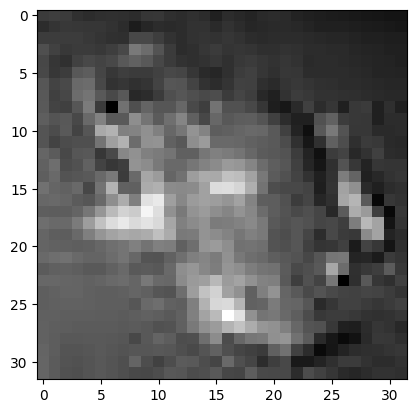

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_data[100][1], cmap="gray")

*shuffled the img_data to ready it for processing*

In [ ]:
import random
random.shuffle(img_data)

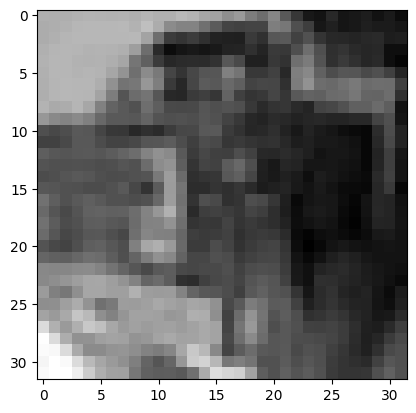

In [ ]:
plt.imshow(img_data[100][1], cmap="gray")

*Declaring Manhattan(L1) and Euclidian(L2) distance functions*

In [ ]:
def manhattan(a,b):
  return np.sum(np.abs(a-b))

def euclidian(a,b):
  return np.sqrt(np.sum((a-b)**2))

In [ ]:
from collections import Counter
from tqdm import tqdm

##Model Building and Evaluation
The dataset was divided in 5 folds. Each fold was evaluated on rest of the dataset and classes were predicted using k-NN algorithm using two distance functions with k values ranging from 1 to 100.

In [ ]:
k=100
man_per = []
ecd_per = []

x=0
y=2000
while(y<10001):
  fold_array=img_data[x:y]
  train_array=img_data[:x]+img_data[y:]
  fold_total_img = 2000
  fold_correct_img_man = [0]*k
  fold_correct_img_ecd = [0]*k
  for fold_unit in tqdm(fold_array, desc="Processing"):
    fold_class, fold_img = fold_unit
    fold_man_unit_list=[]
    fold_ecd_unit_list=[]
    for train_unit in train_array:
      train_class, train_img = train_unit
      fold_man_unit_list.append([train_class, manhattan(fold_img, train_img)])
      fold_ecd_unit_list.append([train_class, euclidian(fold_img, train_img)])
    fold_man_unit_list.sort(key=lambda r: r[1])
    fold_ecd_unit_list.sort(key=lambda r: r[1])
    fold_man = [i[0] for i in fold_man_unit_list[:k]]
    fold_ecd = [i[0] for i in fold_ecd_unit_list[:k]]
    high_man=[]
    high_ecd=[]
    while fold_man:
      counter = Counter(fold_man)
      most_common_number, most_common_count = counter.most_common(1)[0]
      high_man.insert(0, most_common_number)
      fold_man.pop()
    while fold_ecd:
      counter = Counter(fold_ecd)
      most_common_number, most_common_count = counter.most_common(1)[0]
      high_ecd.insert(0, most_common_number)
      fold_ecd.pop()
    for i in range(k):
      if(high_man[i]==fold_class):
        fold_correct_img_man[i]+=1
      if(high_ecd[i]==fold_class):
        fold_correct_img_ecd[i]+=1
  fold_correct_img_man = [(j/fold_total_img)*100 for j in fold_correct_img_man]
  fold_correct_img_ecd = [(j/fold_total_img)*100 for j in fold_correct_img_ecd]
  man_per.append(fold_correct_img_man)
  ecd_per.append(fold_correct_img_ecd)
  x+=2000
  y+=2000

Processing: 100%|██████████| 2000/2000 [06:26<00:00,  5.17it/s]


##Results and Analysis:
*Calculating standard deviation and mean for all values of k of all folds*

In [ ]:
man_fold_acc = []
ecd_fold_acc = []
for index in range(100):
    extracted_elements_man = [sublist[index] for sublist in man_per]
    extracted_elements_ecd = [sublist[index] for sublist in ecd_per]
    man_fold_acc.append(extracted_elements_man)
    ecd_fold_acc.append(extracted_elements_ecd)

In [ ]:
mean_man = [np.mean(i) for i in man_fold_acc]
mean_ecd = [np.mean(i) for i in ecd_fold_acc]

In [ ]:
std_man = [np.std(i) for i in man_fold_acc]
std_ecd = [np.std(i) for i in ecd_fold_acc]

In [ ]:
print(len(mean_man))

100


*k-NN Plot for Manhattan(L1) and Euclidian(L2) Distance[k-value vs. Accuracy]*

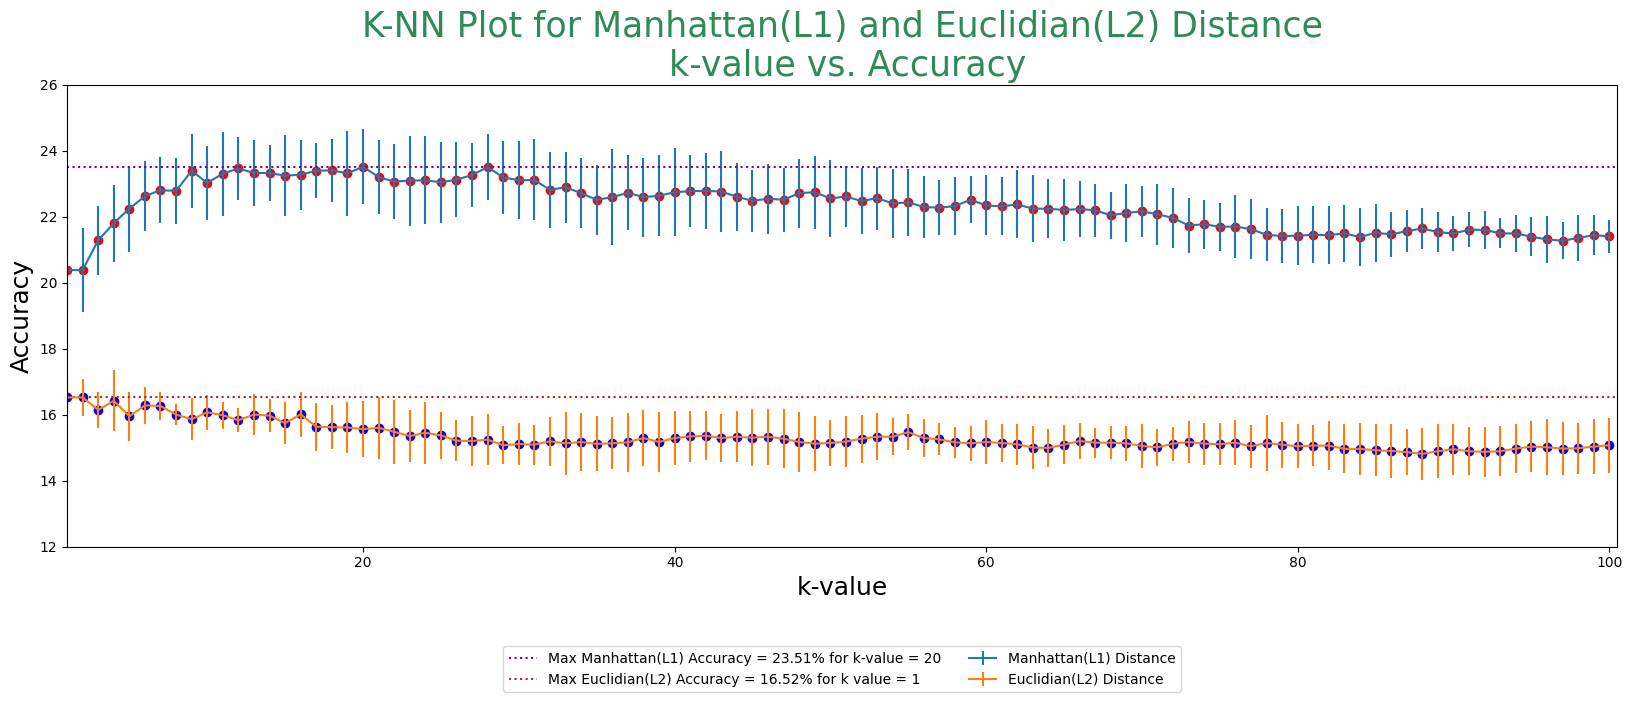

In [ ]:
k=100
plt.figure(figsize=(20, 6))
plt.errorbar(range(1, k+1), mean_man, yerr=std_man, label="Manhattan(L1) Distance")
plt.errorbar(range(1, k+1), mean_ecd, yerr=std_ecd, label="Euclidian(L2) Distance")
plt.scatter(range(1, k+1), mean_man, color="red", marker="o")
plt.scatter(range(1, k+1), mean_ecd, color="blue", marker="o")
plt.xlabel("k-value", size=18)
plt.ylabel("Accuracy", size=18)
plt.title("K-NN Plot for Manhattan(L1) and Euclidian(L2) Distance\n k-value vs. Accuracy", size=25, color="seagreen")
plt.xlim(1, 100.5)
plt.ylim(12, 26)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
max_acc_man = np.argmax(mean_man)
max_acc_ecd = np.argmax(mean_ecd)
plt.axhline(y=mean_man[max_acc_man], linestyle='dotted', color='purple', label=f'Max Manhattan(L1) Accuracy = {round(mean_man[max_acc_man],2)}% for k-value = {max_acc_man+1}')
plt.axhline(y=mean_ecd[max_acc_ecd], linestyle='dotted', color='brown', label=f'Max Euclidian(L2) Accuracy = {round(mean_ecd[max_acc_ecd],2)}% for k value = {max_acc_ecd+1}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()

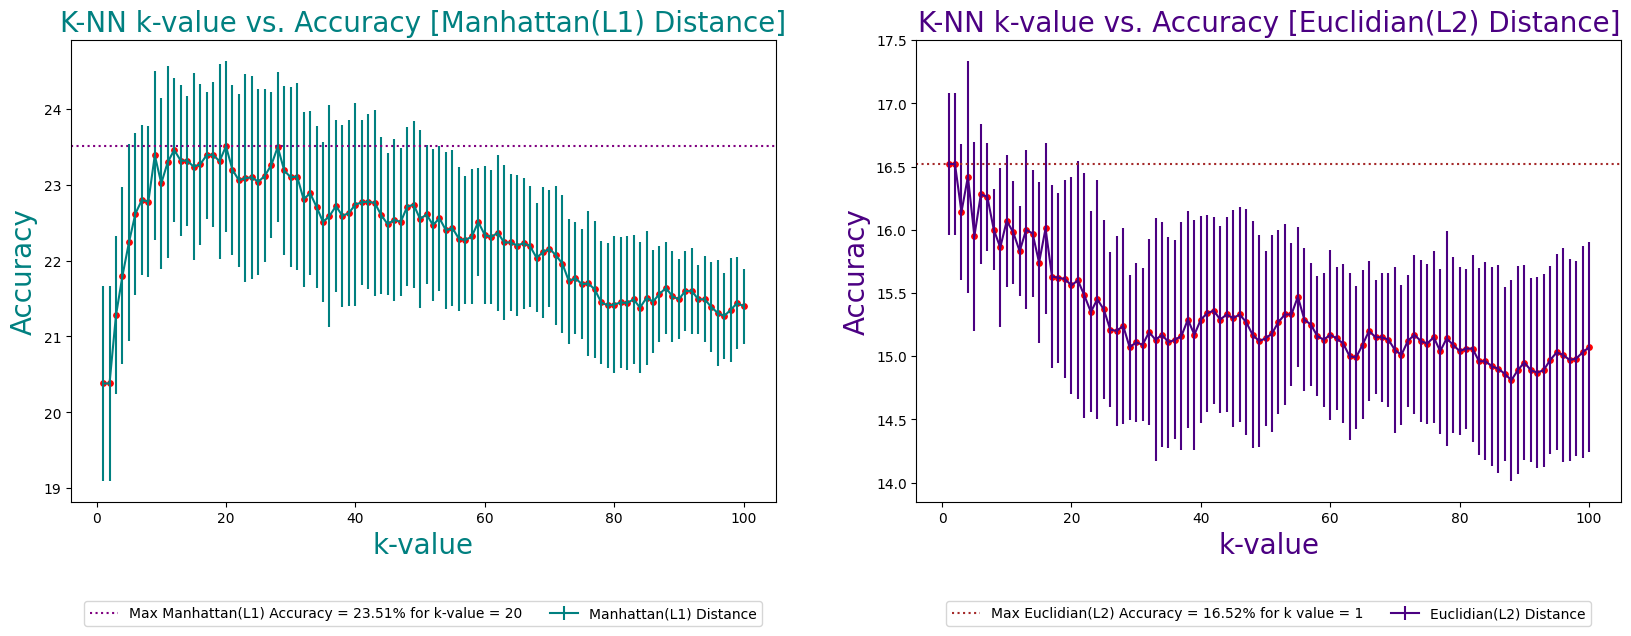

In [ ]:
fig, (p1, p2) = plt.subplots(1, 2, figsize=(20, 6))
p1.errorbar(range(1, k+1), mean_man, yerr=std_man, label="Manhattan(L1) Distance", color="teal")
p1.scatter(range(1, k+1), mean_man, color="red", marker="o", s=15)
p1.set_xlabel("k-value", size=20, color="teal")
p1.set_ylabel("Accuracy", size=20, color="teal")
p1.set_title("K-NN k-value vs. Accuracy [Manhattan(L1) Distance]", size=20, color="teal")
p1.axhline(y=mean_man[max_acc_man], linestyle='dotted', color='purple', label=f'Max Manhattan(L1) Accuracy = {round(mean_man[max_acc_man],2)}% for k-value = {max_acc_man+1}')
p1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
p2.errorbar(range(1, k+1), mean_ecd, yerr=std_ecd, label="Euclidian(L2) Distance", color="indigo")
p2.scatter(range(1, k+1), mean_ecd, color="red", marker="o", s=15)
p2.set_xlabel("k-value", size=20, color="indigo")
p2.set_ylabel("Accuracy", size=20, color="indigo")
p2.set_title("K-NN k-value vs. Accuracy [Euclidian(L2) Distance]", size=20, color="indigo")
p2.axhline(y=mean_ecd[max_acc_ecd], linestyle='dotted', color='brown', label=f'Max Euclidian(L2) Accuracy = {round(mean_ecd[max_acc_ecd],2)}% for k value = {max_acc_ecd+1}')
p2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()

##Discussion:
**Manhattan (L1) distance demonstrated superior performance, achieving 23.51% accuracy with a K value of 20. On the other hand, Euclidean (L2) distance reached its peak accuracy at 16.52% when K was set to 1. For all k values Manhattan(L1) distance measure method performed significantly better.**

**Images with large, generic shapes and clear backgrounds, such as ships and airplanes, were more accurately classified.** Having only 10 classes make the prediction method easier. Otherwise it would have consumed more time and accuracy would have been very low.

Despite the better performance of Manhattan distance, an accuracy rate of 23.51% indicates **it is not reliable for real life application** and there is a significant room for improvement. The k-NN algorithm, particularly time-consuming in this context, may not be the most efficient choice for image classification.

##Top 5 Predictions:
###Method of determination of confidence:

###*Number of Majority vote/Number of nearest naeighbors choosen*

Highest 5 correct prediction values from this were choosen as top 5 predictions.

*The method that is being used for top 5 predictions is not ideal for this particular euclidian(L2) distance as k-value for L2 is 1. So, the confidence of the algorithm will be 100% on all predictions. One other method that couldve been used was to show the only distance for correct predictions.*

In [ ]:
k_man = max_acc_man+1
k_ecd = max_acc_ecd+1
best_man = []
best_ecd = []
for item in tqdm(img_data, desc='Processing'):
  img_class, img = item
  item_man = []
  item_ecd = []
  for t in img_data:
    t_class, t_img = t
    item_man.append([t_class, manhattan(img, t_img)])
    item_ecd.append([t_class, euclidian(img, t_img)])
  item_man.sort(key=lambda r: r[1])
  item_ecd.sort(key=lambda r: r[1])
  item_man_k = [i[0] for i in item_man if i[1]!=0]
  item_ecd_k = [i[0] for i in item_ecd if i[1]!=0]  #to exclude the exact image present in dataset
  item_man_k1 = [i for i in item_man_k[:k_man]]
  item_ecd_k1 = [i for i in item_man_k[:k_ecd]]
  element_count = Counter(item_man_k1)
  most_common_element, highest_occurrence = element_count.most_common(1)[0]
  if(most_common_element==img_class):
    best_man.append([(highest_occurrence/k_man)*100, img, img_class])
  element_count = Counter(item_ecd_k1)
  most_common_element, highest_occurrence = element_count.most_common(1)[0]
  if(most_common_element==img_class):
    best_ecd.append([(highest_occurrence/k_ecd)*100, img, img_class])

Processing: 100%|██████████| 10000/10000 [46:47<00:00,  3.56it/s]


In [ ]:
best_man.sort(key=lambda r: r[0], reverse=True)
best_ecd.sort(key=lambda r: r[0], reverse=True)

In [ ]:
top5_man_per = best_man[:5]
top5_ecd_per = best_ecd[:5]

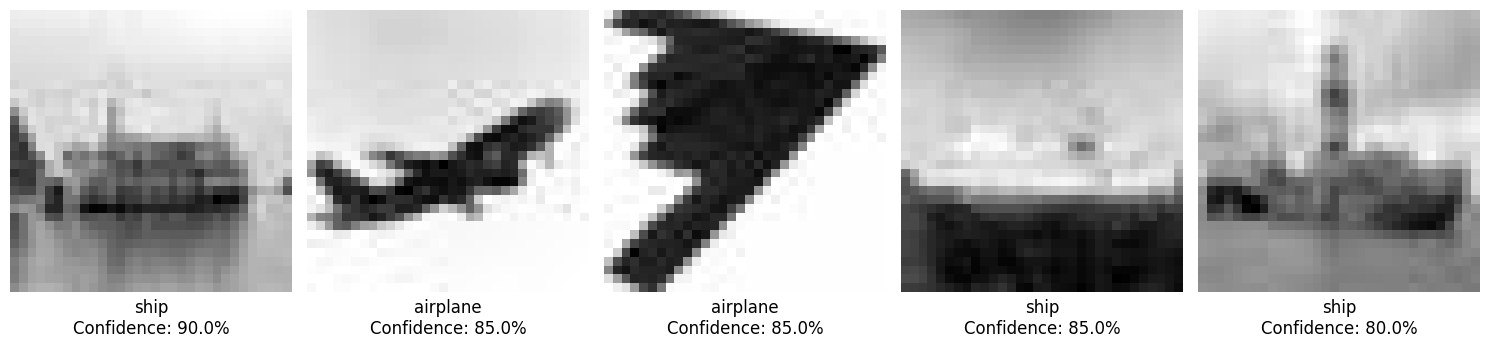

In [ ]:
images = [i[1] for i in top5_man_per]
labels = [i[2] for i in top5_man_per]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].text(0.5, -0.15, class_names[labels[i]]+f"\nConfidence: {round(top5_man_per[i][0],2)}%", fontsize=12, ha='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

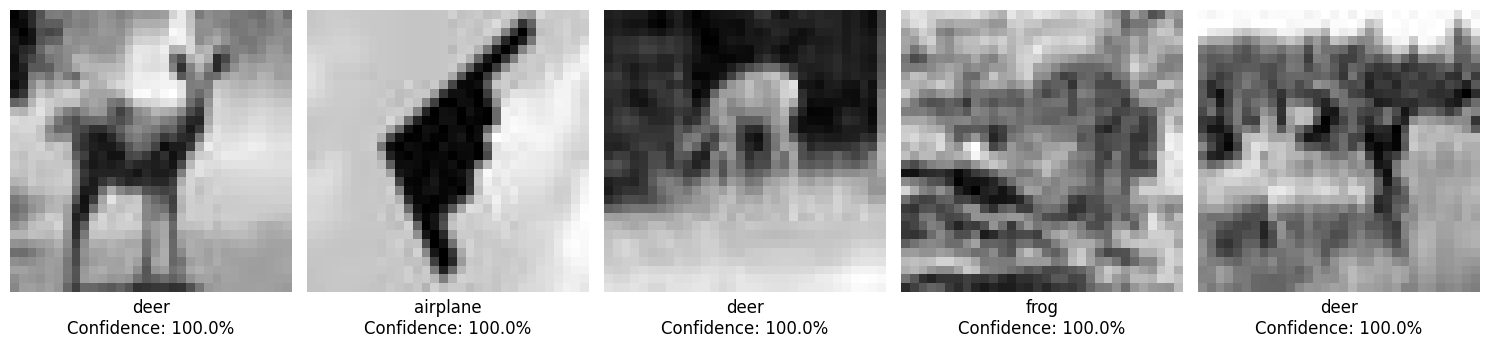

In [ ]:
images = [i[1] for i in top5_ecd_per]
labels = [i[2] for i in top5_ecd_per]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].text(0.5, -0.15, class_names[labels[i]]+f"\nConfidence: {round(top5_ecd_per[i][0],2)}%", fontsize=12, ha='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()